<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Александр! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы».


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂

<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">

Когда я начал знакомиться с твоей работой она показалась мне очень знакомой и я нашел первоисточник. Эта работа студента Алексея Х, которую я проверял два месяца назад.

В связи с этим прошу тебя внести в проект следующие измеенния:

 - используем только экспертные оценки (отказывваемся от круда как источника оценок), соответственно размер обучаюего датасета должен получиться 5822 пары.
 - полный отказ от TF и Keras, вся DL логика должна быть реалиована в экосистеме pytorch, включая библиотеки transformers
   - для векторизации изображений используем модель Resnet18, как в теории к этому спринту. Единственное важное уточнение - отрезать нужно не два последних слоя (в коде из теории), а только один, тогда размерность эмбеддинга будет 512, что очень хорошо.
   - для векторизации текстов используем BERT (или похожие модели-энкодеры). Библиотеки transformers либо sentence-transformers. Рекомендую воспользоваться моделью https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2, с ней получаются лучшие результаты.
   - ну и конечно итоговую модель для оценки соответствия между эмбеддингом изображения и эмбеддингом описания строим используя pytorch


Если ты не согласен с моим решением - пожалуйста свяжись со мной через куратора.


</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Дмитрий, привет! Согласен полностью с твоим замечанием, отнекиваться не буду:( Действительно большая часть кода была копипастом. Очень плохо понял блок связанный компьютерным зрением. Сожалею, что так поступил, но что есть:(
Спасибо, лояльно отнесся к данному факту!)
Вроде бы поправил согласно твоим замечаниям, ненужный код удалять не стал, просто закомментил, чтоб было понятно где начнается разветвление.

</div>

In [ ]:
%pip install -q "dask[dataframe]"



In [ ]:
import os
import sys
import time
import random
import re
import zipfile
import io
import glob
import requests
import warnings
from pathlib import Path
from io import BytesIO

# ====================================================
# 📌 РАБОТА С МАССИВАМИ И ТАБЛИЦАМИ
# ====================================================
import numpy as np
import pandas as pd

# ====================================================
# 📌 РАБОТА С ИЗОБРАЖЕНИЯМИ
# ====================================================
from PIL import Image, ImageOps

# ====================================================
# 📌 МАШИННОЕ ОБУЧЕНИЕ (СКЛАДСКИЙ АНАЛИЗ ДАННЫХ)
# ====================================================
import sklearn
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import (
    GridSearchCV, cross_val_score, train_test_split,
    GroupShuffleSplit, KFold
)
from sklearn.metrics import (
    recall_score, root_mean_squared_error, precision_score,
    make_scorer, accuracy_score
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# ====================================================
# 📌 ГЛУБОКОЕ ОБУЧЕНИЕ (TensorFlow / Keras)
# ====================================================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D,
    BatchNormalization, Reshape, RepeatVector, LSTM, Dropout
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from keras.applications.resnet50 import preprocess_input
import torch
import torchvision.models as models
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.nn as nn
resnet18 = models.resnet18(pretrained=True)
from sentence_transformers import SentenceTransformer, util
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# ====================================================
# 📌 ОБРАБОТКА ЕСТЕСТВЕННОГО ЯЗЫКА (NLP)
# ====================================================
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer


# ====================================================
# 📌 ТРАНСФОРМЕРЫ (BERT / Sentence Transformers)
# ====================================================
import transformers
from transformers import TFBertModel, BertTokenizer
import keras_nlp
from transformers import BertTokenizer, BertModel
from sentence_transformers import SentenceTransformer, util

# ====================================================
# 📌 ВИЗУАЛИЗАЦИЯ ДАННЫХ
# ====================================================
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tqdm import notebook
tqdm.pandas()

# ====================================================
# 📌 НАСТРОЙКИ И КОНСТАНТЫ
# ====================================================
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Загрузка ресурсов NLTK
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')

# Константы
RANDOM_STATE = 42
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

# Вывод пути интерпретатора Python
print("Python Interpreter Path:", sys.executable)

In [ ]:
device = torch.device("cpu")

## Введение

Заказчик исследования: фотохостинг для профессиональных фотографов «Со Смыслом» (“With Sense”)

Исходные данные: данные с именем файла изображения, идентификатор описания и текст описания, изображения для тренировки модели, данные по соответствию изображения и описания, полученные с помощью краудсорсинга, данные по соответствию изображения и описания, полученные в результате опроса экспертов, информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение.

Цель исследования: Для демонстрационной версии нужно выбрать лучшую модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — и покажет, насколько текст и картинка подходят друг другу.

План нашего проекта состоит из двух пунктов:

1) Загрузка данных

2) Исследовательский анализ данных

3) Объединение данных

4) Удаление запрещенного контента

5) Обучение моделей

## Загрузка данных

Создадим переменные с путями:

In [ ]:
# URL с архивом изображений
zip_url = "https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip"

# Локальная директория для распаковки
extract_path = "/content"

url_train_dataset = 'https://raw.githubusercontent.com/AlexandrChubarov/Image_Search/refs/heads/main/datasets/train_dataset.csv'
url_test_images = 'https://raw.githubusercontent.com/AlexandrChubarov/Image_Search/refs/heads/main/datasets/test_images.csv'
url_test_queries = 'https://raw.githubusercontent.com/AlexandrChubarov/Image_Search/refs/heads/main/datasets/test_queries.csv'
url_CrowdAnnotations = 'https://raw.githubusercontent.com/AlexandrChubarov/Image_Search/refs/heads/main/datasets/CrowdAnnotations.tsv'
url_ExpertAnnotations = 'https://raw.githubusercontent.com/AlexandrChubarov/Image_Search/refs/heads/main/datasets/ExpertAnnotations.tsv'

local_file_path_train_dataset = '/content/to_upload/train_dataset.csv'
local_file_path_test_images = '/content/to_upload/test_images.csv'
local_file_path_test_queries = '/content/to_upload/test_queries.csv'
local_file_path_CrowdAnnotations = '/content/to_upload/CrowdAnnotations.tsv'
local_file_path_ExpertAnnotations = '/content/to_upload/ExpertAnnotations.tsv'

test_images_dir = "/content/to_upload/test_images/"
train_images_dir = "/content/to_upload/train_images/"

test_images_target = "/content/to_upload/resized_test_images/"
train_images_target = "/content/to_upload/resized_train_images/"

Создадим функцию для выгрузки и распаковки данных:

In [ ]:
def download_and_extract_zip(url, extract_to):

    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()

        with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
            zip_ref.extractall(extract_to)

        print(f"Архив успешно загружен и распакован в {extract_to}")
    except Exception as e:
        print(f"Ошибка загрузки или распаковки: {str(e)}")

Создадим функцию для выгрузки и загрузки данных:

In [ ]:
def load_data(local_file_path, remote_url, sep=',', decimal='.', date_columns=None, index_col=None, names=None):
    try:
        if os.path.exists(local_file_path):
            print(f'Загрузка данных из локального файла: {local_file_path}')
            return pd.read_csv(
                local_file_path,
                sep=sep,
                names=names,
                decimal=decimal,
                parse_dates=date_columns if date_columns else False,  # Указываем parse_dates только при необходимости
                index_col=index_col
            )
        else:
            print(f'Загрузка данных из удаленного источника: {remote_url}')
            return pd.read_csv(
                remote_url,
                sep=sep,
                names=names,
                decimal=decimal,
                parse_dates=date_columns if date_columns else False,  # Указываем parse_dates только при необходимости
                index_col=index_col
            )
    except Exception as e:
        print('Загрузка произошла с ошибкой')
        print(f'Ошибка: {str(e)}')
        return None

Загрузим и распакуем архив:

In [ ]:
download_and_extract_zip(zip_url, extract_path)

Загрузим наши данные:

Первые 5 строк данных:


image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  
0  A young child is wearing blue goggles and sitt...  
1  A young child is wearing blue goggles and sitt...  
2  A young child is wearing blue goggles and sitt...  
3  A young child is wearing blue goggles and sitt...  
4  A young child is wearing blue goggles and sitt...


Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


None


Описание числовых данных:


image                     query_id  \
count                        5822                         5822   
unique                       1000                          977   
top     3364151356_eecd07a23e.jpg  2600867924_cd502fc911.jpg#2   
freq                           10                           34   

                                               query_text  
count                                                5822  
unique                                                977  
top     Two dogs , one brown and white and one black a...  
freq                                                   34


Количество пропущенных значений:


image         0
query_id      0
query_text    0
dtype: int64


Количество уникальных значений в каждом столбце:


image         1000
query_id       977
query_text     977
dtype: int64


Количество дубликатов: 0

Максимальное количество символов в 'query_text' (без лишних пробелов): 153
Минимальное количество символов в 'query_text' (без лишних пробелов): 11


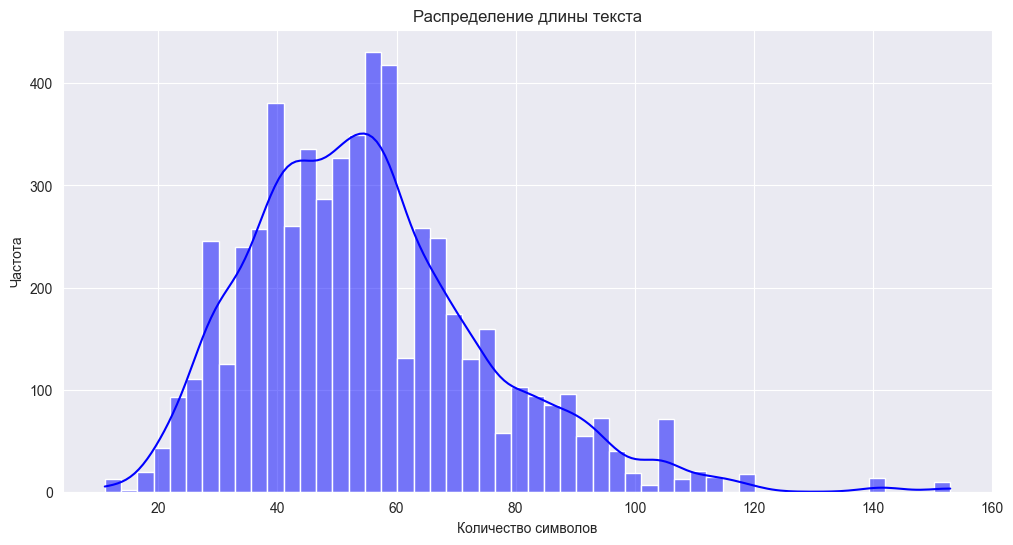


Количество слов в 'query_text':
Максимум: 34
Минимум: 2
Среднее: 11.90
Медиана: 11.0


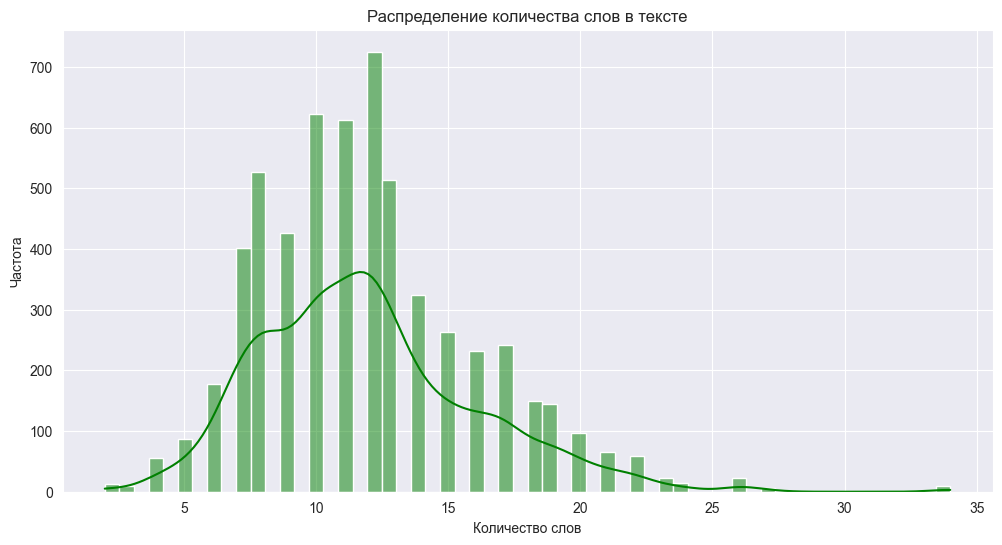

In [9]:
data_train_dataset = load_data(
    local_file_path=local_file_path_train_dataset,
    remote_url=url_train_dataset
    )

data_test_images = load_data(
    local_file_path=local_file_path_test_images,
    remote_url=url_test_images
    )

data_test_queries = load_data(
    local_file_path=local_file_path_test_queries,
    remote_url=url_test_queries,
    sep='|',
    index_col=[0]
    )

data_crowd_annot = load_data(
    local_file_path=local_file_path_CrowdAnnotations,
    remote_url=url_CrowdAnnotations,
    sep='\t',
    names = ['image', 'query_id', 'fraction', 'pros', 'cons']
    )

data_expert_annot = load_data(
    local_file_path=local_file_path_ExpertAnnotations,
    remote_url=url_ExpertAnnotations,
    sep='\t',
    names = ['image', 'query_id', 'expert_1', 'expert_2', 'expert_3']
    )


Создадим функцию для первичного осмотра данных и первичной аналитике :

Первые 5 строк данных:


query_id  \
0  1177994172_10d143cb8d.jpg#0   
1  1177994172_10d143cb8d.jpg#1   
2  1177994172_10d143cb8d.jpg#2   
3  1177994172_10d143cb8d.jpg#3   
4  1177994172_10d143cb8d.jpg#4   

                                          query_text  \
0  Two blonde boys , one in a camouflage shirt an...   
1  Two boys are squirting water guns at each other .   
2            Two boys spraying each other with water   
3  Two children wearing jeans squirt water at eac...   
4  Two young boys are squirting water at each oth...   

                       image  
0  1177994172_10d143cb8d.jpg  
1  1177994172_10d143cb8d.jpg  
2  1177994172_10d143cb8d.jpg  
3  1177994172_10d143cb8d.jpg  
4  1177994172_10d143cb8d.jpg


Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    500 non-null    object
 1   query_text  500 non-null    object
 2   image       500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


None


Описание числовых данных:


query_id  \
count                           500   
unique                          500   
top     1177994172_10d143cb8d.jpg#0   
freq                              1   

                                               query_text  \
count                                                 500   
unique                                                500   
top     Two blonde boys , one in a camouflage shirt an...   
freq                                                    1   

                            image  
count                         500  
unique                        100  
top     1177994172_10d143cb8d.jpg  
freq                            5


Количество пропущенных значений:


query_id      0
query_text    0
image         0
dtype: int64


Количество уникальных значений в каждом столбце:


query_id      500
query_text    500
image         100
dtype: int64


Количество дубликатов: 0

Максимальное количество символов в 'query_text' (без лишних пробелов): 135
Минимальное количество символов в 'query_text' (без лишних пробелов): 19


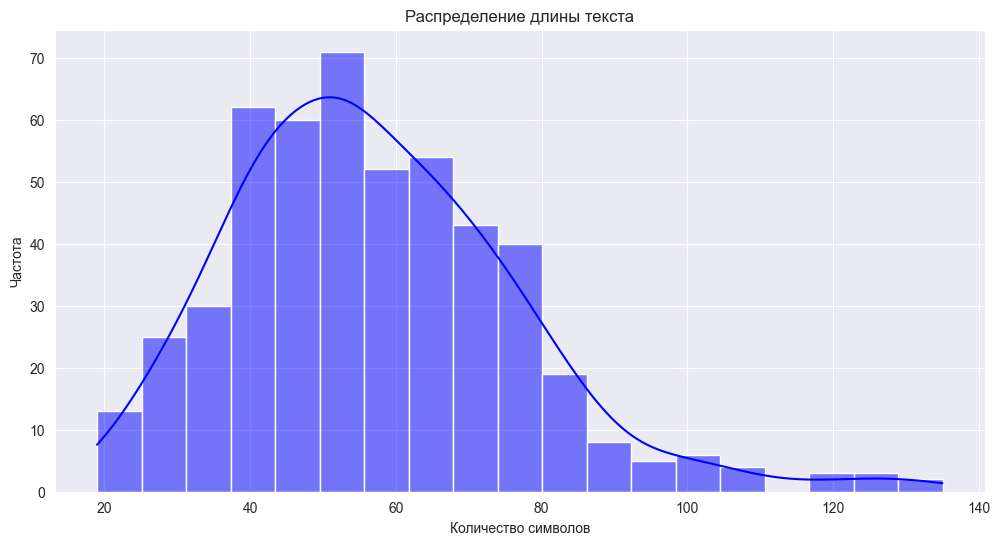


Количество слов в 'query_text':
Максимум: 31
Минимум: 4
Среднее: 12.20
Медиана: 12.0


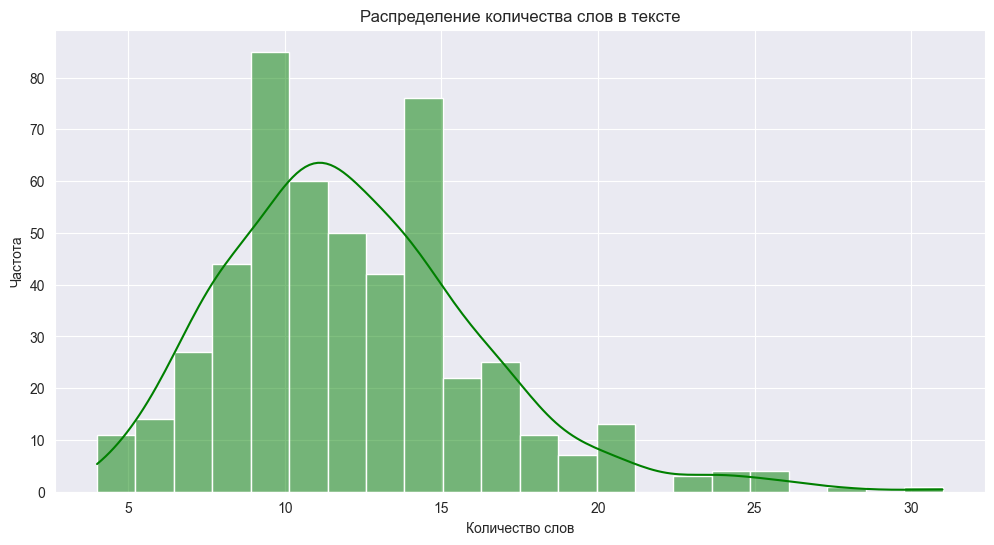

In [11]:
def data_overview(df, text_column, plot=True):

    data = df.copy()

    print("Первые 5 строк данных:")
    display(data.head())

    print("\nОбщая информация о данных:")
    display(data.info())

    print("\nОписание числовых данных:")
    display(data.describe())

    print("\nКоличество пропущенных значений:")
    display(data.isnull().sum())

    print("\nКоличество уникальных значений в каждом столбце:")
    display(data.nunique())

    # Проверка дубликатов
    duplicate_count = data.duplicated().sum()
    print(f"\nКоличество дубликатов: {duplicate_count}")
    if duplicate_count > 0:
        print("Примеры дубликатов:")
        display(data[data.duplicated()].head())

    if plot:
      # Вычисление длины текста
      data['text_length'] = data[text_column].str.strip().str.len()
      print(f"\nМаксимальное количество символов в '{text_column}' (без лишних пробелов): {data['text_length'].max()}")
      print(f"Минимальное количество символов в '{text_column}' (без лишних пробелов): {data['text_length'].min()}")

      plt.figure(figsize=(12, 6))
      sns.histplot(data['text_length'], kde=True, color='blue')
      plt.title("Распределение длины текста")
      plt.xlabel("Количество символов")
      plt.ylabel("Частота")
      plt.show()

      data['word_count'] = data[text_column].str.strip().str.split().apply(len)
      print(f"\nКоличество слов в '{text_column}':")
      print(f"Максимум: {data['word_count'].max()}")
      print(f"Минимум: {data['word_count'].min()}")
      print(f"Среднее: {data['word_count'].mean():.2f}")
      print(f"Медиана: {data['word_count'].median()}")

      plt.figure(figsize=(12, 6))
      sns.histplot(data['word_count'], kde=True, color='green')
      plt.title("Распределение количества слов в тексте")
      plt.xlabel("Количество слов")
      plt.ylabel("Частота")
      plt.show()

    return


Первые 5 строк данных:


image                     query_id  fraction  pros  \
0  1056338697_4f7d7ce270.jpg  1056338697_4f7d7ce270.jpg#2       1.0     3   
1  1056338697_4f7d7ce270.jpg   114051287_dd85625a04.jpg#2       0.0     0   
2  1056338697_4f7d7ce270.jpg  1427391496_ea512cbe7f.jpg#2       0.0     0   
3  1056338697_4f7d7ce270.jpg  2073964624_52da3a0fc4.jpg#2       0.0     0   
4  1056338697_4f7d7ce270.jpg  2083434441_a93bc6306b.jpg#2       0.0     0   

   cons  
0     0  
1     3  
2     3  
3     3  
4     3


Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     47830 non-null  object 
 1   query_id  47830 non-null  object 
 2   fraction  47830 non-null  float64
 3   pros      47830 non-null  int64  
 4   cons      47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


None


Описание числовых данных:


fraction          pros          cons
count  47830.000000  47830.000000  47830.000000
mean       0.068786      0.208488      2.820155
std        0.207532      0.628898      0.656676
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      3.000000
50%        0.000000      0.000000      3.000000
75%        0.000000      0.000000      3.000000
max        1.000000      5.000000      6.000000


Количество пропущенных значений:


image       0
query_id    0
fraction    0
pros        0
cons        0
dtype: int64


Количество уникальных значений в каждом столбце:


image       1000
query_id    1000
fraction      12
pros           6
cons           7
dtype: int64


Количество дубликатов: 0


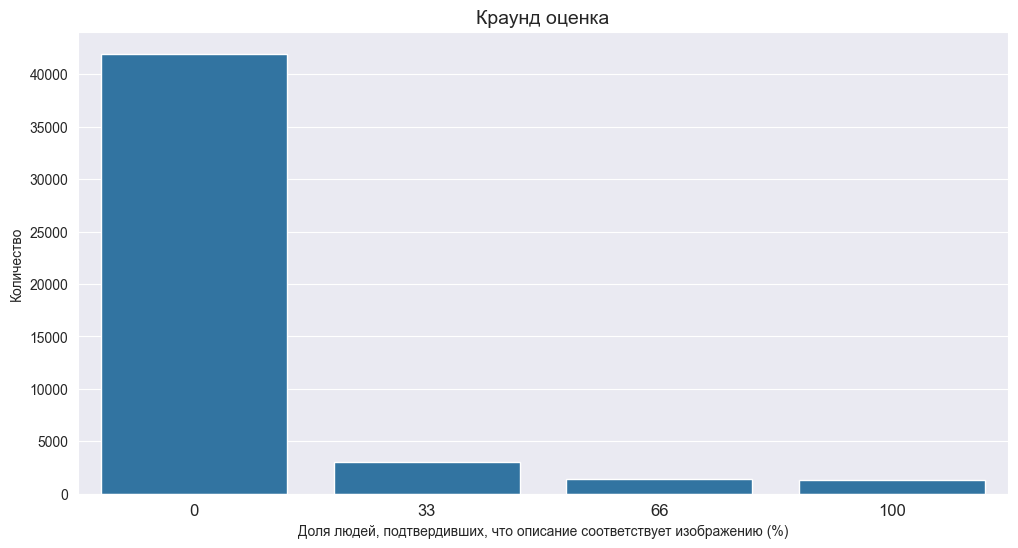

In [12]:
data_overview(
    df=data_train_dataset,
    text_column='query_text'
)

In [13]:
data_overview(
    df=data_test_images,
    text_column='image',
    plot=False
)

Первые 5 строк данных:


image                     query_id  expert_1  expert_2  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2         1         1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2         1         1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2         1         1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2         1         2   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2         1         1   

   expert_3  
0         1  
1         2  
2         2  
3         2  
4         2


Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   expert_1  5822 non-null   int64 
 3   expert_2  5822 non-null   int64 
 4   expert_3  5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


None


Описание числовых данных:


expert_1     expert_2     expert_3
count  5822.000000  5822.000000  5822.000000
mean      1.436620     1.624356     1.881999
std       0.787084     0.856222     0.904087
min       1.000000     1.000000     1.000000
25%       1.000000     1.000000     1.000000
50%       1.000000     1.000000     2.000000
75%       2.000000     2.000000     2.000000
max       4.000000     4.000000     4.000000


Количество пропущенных значений:


image       0
query_id    0
expert_1    0
expert_2    0
expert_3    0
dtype: int64


Количество уникальных значений в каждом столбце:


image       1000
query_id     977
expert_1       4
expert_2       4
expert_3       4
dtype: int64


Количество дубликатов: 0


In [ ]:
data_overview(
    df=data_test_queries,
    text_column='query_text'
)

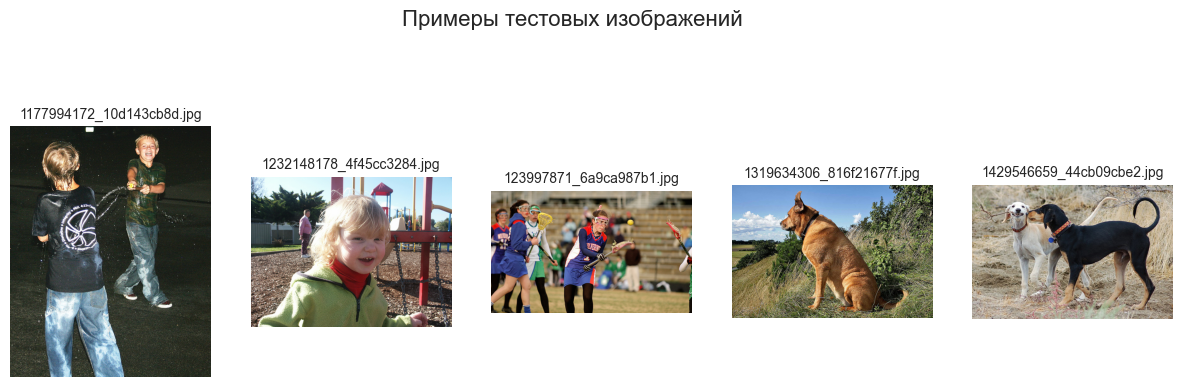

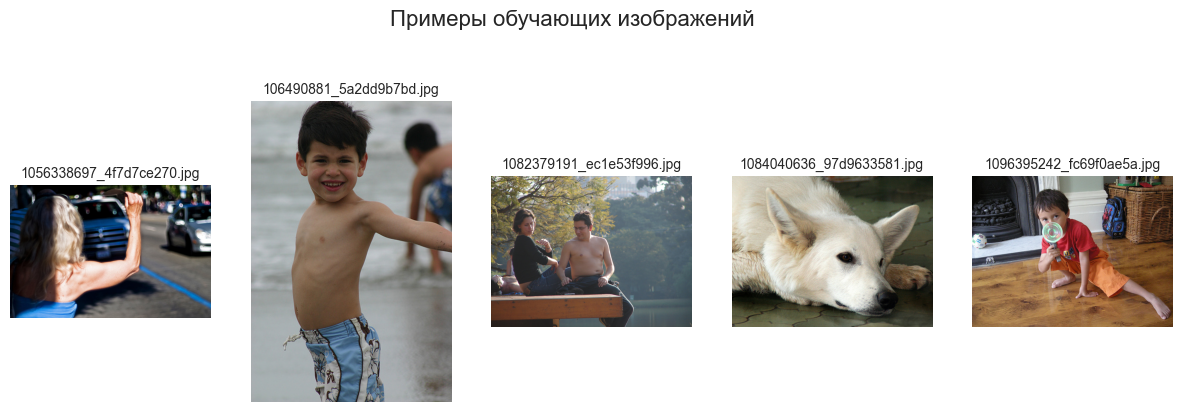

In [14]:
data_overview(
    df=data_crowd_annot,
    text_column='image',
    plot=False
)

crowd_analicit = data_crowd_annot.copy()
crowd_analicit['fraction'] *= 100
crowd_analicit['fraction'] = crowd_analicit['fraction'].astype('int')
crowd_array=[]
fraction_nums = np.array([0, 33, 66, 100])
for i in fraction_nums:
    crowd_array.append((crowd_analicit['fraction'] == i).sum())

plt.figure(figsize=(12, 6))
sns.barplot(x = fraction_nums, y = crowd_array)
plt.title('Краунд оценка', fontsize=14)
plt.xticks(size=12)
plt.xlabel('Доля людей, подтвердивших, что описание соответствует изображению (%)')
plt.ylabel('Количество')
plt.show()

In [ ]:
data_overview(
    df=data_expert_annot,
    text_column='image',
    plot=False
)

Теперь рассмотрим изображения поближе. Создадим для этого функцию:

In [ ]:
def display_sample_images(image_dir, num_images=5, title="Примеры изображений"):
    """
    Функция для отображения примеров изображений из указанной директории.
    """
    if not os.path.exists(image_dir):
        print(f"Директория {image_dir} не найдена.")
        return

    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

    if not image_files:
        print(f"В директории {image_dir} нет изображений.")
        return

    num_images = min(num_images, len(image_files))
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    fig.suptitle(title, fontsize=16)

    for i in range(num_images):
        image_path = os.path.join(image_dir, image_files[i])
        img = Image.open(image_path)
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(image_files[i], fontsize=10)

    plt.show()

# Проверяем примеры изображений после распаковки
display_sample_images(test_images_dir, title="Примеры тестовых изображений")
display_sample_images(train_images_dir, title="Примеры обучающих изображений")

Определим максимальный и минимальный размер изображения. Для этого тоже создадим функцию:

In [ ]:
def get_image_sizes(image_dir):
    if not os.path.exists(image_dir):
        print(f"Директория {image_dir} не найдена.")
        return None, None

    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

    if not image_files:
        print(f"В директории {image_dir} нет изображений.")
        return None, None

    sizes = []
    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        with Image.open(image_path) as img:
            sizes.append(img.size)  # (width, height)

    min_size = min(sizes, key=lambda x: x[0] * x[1])
    max_size = max(sizes, key=lambda x: x[0] * x[1])

    return min_size, max_size

Определим размеры изображений

In [ ]:
min_test_size, max_test_size = get_image_sizes(test_images_dir)
min_train_size, max_train_size = get_image_sizes(train_images_dir)

print(f"Тестовые изображения - Мин. размер: {min_test_size}, Макс. размер: {max_test_size}")
print(f"Обучающие изображения - Мин. размер: {min_train_size}, Макс. размер: {max_train_size}")

Созадим функцию для подсчета количества изображений в папке:

In [ ]:
def count_images(image_dir):
    if not os.path.exists(image_dir):
        return f"Директория {image_dir} не найдена."

    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
    return len(image_files)

Подсчитаем количество изображений:

In [ ]:
print(f'Кол-во изображений test: {count_images(test_images_dir)}, кол-во изображений train: {count_images(train_images_dir)}')

Итак, на этапе загрузки выполнены следующие шаги по загрузке и предварительному анализу данных:

1. Подготовка окружения: Импортированы необходимые библиотеки Python для работы с данными, машинного обучения, нейронных сетей и обработки текста. Настроена среда разработки, включая установку зависимостей и настройку параметров визуализации.

2. Загрузка данных: Данные успешно загружены из локальных файлов и удаленных источников. Использованы следующие наборы данных:
    ⦁ `train_dataset.csv`: Содержит изображения и соответствующие текстовые запросы для обучения модели.
    ⦁ `test_images.csv`: Список изображений, предназначенных для тестирования модели.
    ⦁ `test_queries.csv`: Текстовые запросы, относящиеся к изображениям из тестового набора.
    ⦁ `CrowdAnnotations.tsv`: Аннотации, полученные с помощью краудсорсинга, отражающие соответствие изображений текстовым описаниям.
    ⦁ `ExpertAnnotations.tsv`: Экспертные оценки соответствия изображений и текста.

   Кроме того, загружен и распакован архив с изображениями, содержащий следующие директории:

    ⦁ `/content/to_upload/test_images/`

    ⦁ `/content/to_upload/train_images/`

3. Первичный анализ данных: Проведен предварительный анализ данных, включающий:
    ⦁ Общий анализ: Изучена структура данных, типы данных, количество записей, уникальные значения и наличие пропусков.
    ⦁ Анализ текста (`query_text`): Проанализированы текстовые описания изображений. Длина текстов варьируется от 11 до 153 символов, количество слов – от 2 до 34 (среднее значение – 11.9 слов). Пропуски и дубликаты в текстовых описаниях отсутствуют. Визуализировано распределение длины текстов и количества слов.
    ⦁ Анализ аннотаций: Исследованы аннотации. В краудсорсинговой разметке преобладают случаи несоответствия изображений текстовым описаниям (более 40 000 случаев). Экспертные аннотации используют шкалу от 1 до 4 для оценки соответствия.

4. Визуальный осмотр изображений: Проведен визуальный просмотр образцов изображений из директорий `test_images/` и `train_images/` для проверки корректности загрузки и общего представления о данных.

5. Определение размеров изображений: Определены минимальные и максимальные размеры изображений:
    ⦁ Тестовые изображения: от 320x240 до 500x454 пикселей.
    ⦁ Обучающие изображения: от 500x166 до 500x500 пикселей.

Ключевые выводы:

⦁ Данные успешно загружены и не содержат пропусков или дубликатов.
⦁ Количество изображений соответствует количеству меток в аннотациях.
⦁ Текстовые описания изображений имеют различную длину (как по количеству символов, так и по количеству слов).
⦁ В краудсорсинговой разметке значительное количество изображений отмечено как не соответствующие текстовым описаниям, что может повлиять на процесс обучения модели.
⦁ Размеры изображений варьируются, что может потребовать их нормализации перед использованием в моделях машинного обучения.
⦁ Визуальный анализ изображений подтвердил их разнообразие и соответствие аннотациям.

## Исследовательский анализ данных

Для удобства дальнейшего анализа. Создадим функцию для приведения изображений к единому размеру 224*224:

In [ ]:
def resize_with_padding(source_dir, target_dir, size=(224, 224), fill_color=(0, 0, 0)):

    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    image_files = [f for f in os.listdir(source_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

    for image_file in image_files:
        image_path = os.path.join(source_dir, image_file)
        with Image.open(image_path) as img:
            img.thumbnail(size, Image.LANCZOS)

            # Новый холст
            new_img = Image.new("RGB", size, fill_color)

            # Ищем центр
            x_offset = (size[0] - img.size[0]) // 2
            y_offset = (size[1] - img.size[1]) // 2

            # изображение в центр
            new_img.paste(img, (x_offset, y_offset))
            new_img.save(os.path.join(target_dir, image_file))

    print(f"Все изображения из {source_dir} обработаны и сохранены в {target_dir}")

Применим к нашим папкам:

In [ ]:
resize_with_padding(test_images_dir, test_images_target)
resize_with_padding(train_images_dir, train_images_target)

Определим итоговый резльтат:

In [ ]:
min_test_size, max_test_size = get_image_sizes(test_images_target)
min_train_size, max_train_size = get_image_sizes(train_images_target)
print(f"Тестовые изображения - Мин. размер: {min_test_size}, Макс. размер: {max_test_size}")
print(f"Обучающие изображения - Мин. размер: {min_train_size}, Макс. размер: {max_train_size}")

Посмотрим как теперь выглядят изображения:

In [ ]:
display_sample_images(test_images_target, title="Примеры тестовых изображений")
display_sample_images(train_images_target, title="Примеры обучающих изображений")

Итак, всё нормально. Можно приступать к пострению графиков. Начнем с распределения оценки экспертов:

In [ ]:
expert_columns = ['expert_1', 'expert_2', 'expert_3']
expert_mean = data_expert_annot[expert_columns].mean()
expert_median = data_expert_annot[expert_columns].median()

plt.figure(figsize=(12, 6))
plt.bar(expert_mean.index, expert_mean.values, label="Среднее значение", alpha=0.7)
plt.plot(expert_median.index, expert_median.values, marker='o', linestyle='-', color='red', label="Медианное значение")
plt.title("Средние и медианные значения оценок по экспертам", fontsize=16)
plt.xlabel("Эксперты", fontsize=14)
plt.ylabel("Оценка", fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Т.к. оценка очень низка, посмотрим как оцениваю эксперт 1 и 2 при условии, что эксперт поставил оценку = 4:

In [ ]:
filtered_df = data_expert_annot[data_expert_annot['expert_3'] == 4]
expert_columns = ['expert_1', 'expert_2', 'expert_3']
expert_mean = filtered_df[expert_columns].mean()
expert_median = filtered_df[expert_columns].median()

plt.figure(figsize=(12, 6))
plt.bar(expert_mean.index, expert_mean.values, label="Среднее значение", alpha=0.7)
plt.plot(expert_median.index, expert_median.values, marker='o', linestyle='-', color='red', label="Медианное значение")
plt.title("Средние и медианные значения оценок по экспертам (только expert_3 = 4)", fontsize=16)
plt.xlabel("Эксперты", fontsize=14)
plt.ylabel("Оценка", fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Так как средние значения очень низки, можно сказать, что экспертам показывали рандомно описание и изображение.

Теперь по отдельности изучим оценки экспертов:

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
titles = ["Оценки эксперта 1", "Оценки эксперта 2", "Оценки эксперта 3"]
for i, col in enumerate(expert_columns):
    sns.countplot(x=data_expert_annot[col], ax=axes[i], palette="viridis")
    axes[i].set_title(titles[i], fontsize=14)
    axes[i].set_xlabel("Оценка", fontsize=12)
    axes[i].set_ylabel("Количество", fontsize=12)

plt.tight_layout()
plt.show()

Очевидно, 3 эксперт более лоялен при оценке. Посмотрим какие пары были предложены экспертам каждой из оценок:

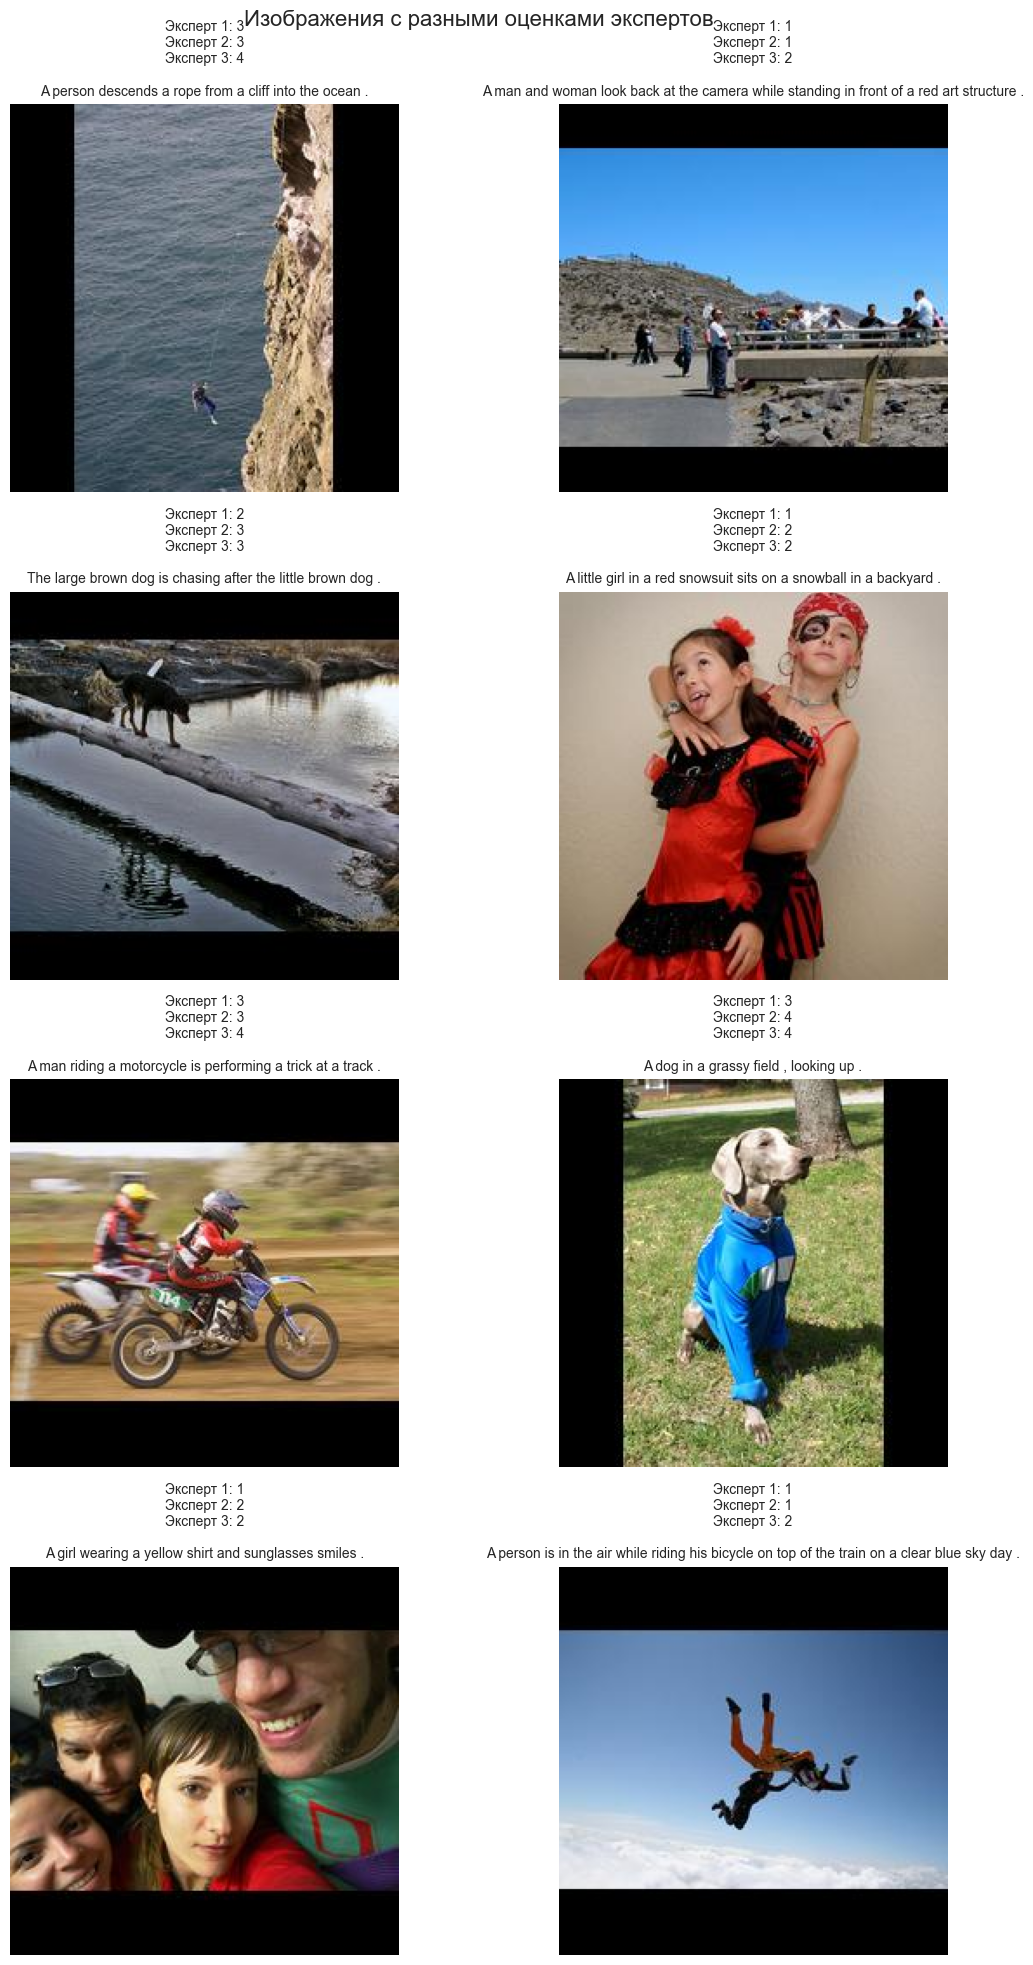

In [27]:
def sample_images_by_score(expert_df, train_df, image_dir, sample_size=2):
    sampled_images = []

    # Определяем уникальные оценки экспертов
    unique_scores = sorted(set(expert_df[['expert_1', 'expert_2', 'expert_3']].values.flatten()))

    for score in unique_scores:
        filtered_df = expert_df[
            (expert_df['expert_1'] == score) |
            (expert_df['expert_2'] == score) |
            (expert_df['expert_3'] == score)
        ]

        sampled_df = filtered_df.sample(min(sample_size, len(filtered_df)), random_state=42)

        for _, row in sampled_df.iterrows():
            image_path = os.path.join(image_dir, row['image'])
            if os.path.exists(image_path):
                description = train_df[train_df['image'] == row['image']]['query_text'].values[0]

                sampled_images.append((image_path, description, score))

    return sampled_images

# Получаем список изображений по оценкам
sampled_images = sample_images_by_score(data_expert_annot, data_train_dataset, train_images_target, sample_size=2)

# Визуализируем изображения
num_scores = len(set(data_expert_annot[['expert_1', 'expert_2', 'expert_3']].values.flatten()))
fig, axes = plt.subplots(num_scores, 2, figsize=(10, num_scores * 3))
fig.suptitle("Примеры изображений с разными оценками экспертов", fontsize=16)

row_idx = 0
for i, (image_path, description, score) in enumerate(sampled_images):
    col_idx = i % 2
    row_idx = i // 2

    img = Image.open(image_path)
    axes[row_idx, col_idx].imshow(img)
    axes[row_idx, col_idx].axis("off")
    axes[row_idx, col_idx].set_title(f"Оценка: {score}\n{description}", fontsize=10)

plt.tight_layout()
plt.show()

Итак, оценка 4 полностью соотвествует описанию.В оценках 2 и 3 эксперты примерно привязывали описание к изображению.

Теперь рассмотрим как эксперты оценили одно и то же описание и одно и то же фото, но с разными оценками:

In [ ]:
mismatched_df = data_expert_annot[
    (data_expert_annot['expert_1'] != data_expert_annot['expert_2']) |
    (data_expert_annot['expert_1'] != data_expert_annot['expert_3']) |
    (data_expert_annot['expert_2'] != data_expert_annot['expert_3'])
]

sample_size = min(8, len(mismatched_df))
sampled_df = mismatched_df.sample(sample_size, random_state=42)


num_cols = 2
num_rows = (sample_size + 1) // num_cols  # округление вверх

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 5))
fig.suptitle("Изображения с разными оценками экспертов", fontsize=16)

axes = axes.flatten()

for i, (_, row) in enumerate(sampled_df.iterrows()):
    image_path = os.path.join(train_images_target, row['image'])

    if os.path.exists(image_path):
        img = Image.open(image_path)
        description = data_train_dataset[data_train_dataset['image'] == row['image']]['query_text'].values[0]

        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(f"Эксперт 1: {row['expert_1']}\n"
                          f"Эксперт 2: {row['expert_2']}\n"
                          f"Эксперт 3: {row['expert_3']}\n\n"
                          f"{description}", fontsize=10)


for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

Итак, эксперты даже, если описание полностью соответствущие изображению, ставят 3. Качественной такую экспертизу назвать очень слжно.

Таким образом, на этапе исследовательского анализа данных, был проведен анализ, включающий следующие этапы:

1. Приведение изображений к единому размеру:

Для обеспечения корректной работы нейронной сети все изображения были преобразованы к единому размеру 224x224 пикселей с сохранением исходных пропорций. Масштабирование осуществлено с помощью метода thumbnail(), который изменяет размер изображения по большей стороне, а затем дополняет недостающую область (паддинг) до целевого размера. В результате все изображения имеют одинаковый размер 224x224 пикселей. Визуальная проверка подтвердила корректность работы метода и отсутствие искажений изображений.

2. Распределение оценок экспертов:

Анализ средних и медианных значений оценок экспертов показал следующее:

⦁ Средние оценки достаточно низкие, что свидетельствует о проблемах с качеством текстовых описаний изображений.
⦁ Третий эксперт, как правило, выставлял более высокие оценки, демонстрируя более лояльный подход к интерпретации описаний.

3. Гистограммы распределения оценок экспертов:

Гистограммы распределения оценок экспертов выявили:

⦁ Расхождения в оценках между экспертами. Третий эксперт чаще ставил более высокие оценки.
⦁ Преобладание оценок 1 и 2, что указывает на низкий уровень соответствия текстовых описаний изображениям.

4. Визуальный анализ изображений с разными оценками:

Визуальный анализ изображений с разными оценками показал:

⦁ Изображения с оценкой 4 полностью соответствуют текстовым описаниям.
⦁ Оценки 2 и 3 соответствуют частичному соответствию, где эксперты пытались найти связь между текстом и изображением.
⦁ Модель, вероятно, также будет вынуждена искать даже незначительные признаки соответствия между текстом и изображением.

5. Выборка изображений с разными оценками экспертов:

Анализ выборки изображений с разными оценками выявил:

⦁ Некоторым изображениям с идеальным соответствием были выставлены заниженные оценки, в то время как другие изображения с низким соответствием получили завышенные оценки.
⦁ Этот фактор субъективности в оценках экспертов может негативно повлиять на качество обучения модели.

6. Выборка изображений с расхождениями в оценках экспертов:

Анализ выборки изображений с расхождениями в оценках между экспертами показал:

⦁ Существуют случаи, когда один эксперт выставляет оценку 4, а другие – 2 или 3.
⦁ Пример: изображение человека, спускающегося по веревке со скалы в океан, получило оценку 4 только от третьего эксперта, в то время как остальные эксперты поставили оценку 3, несмотря на полное соответствие описания.
⦁ Такие расхождения указывают на субъективность оценок экспертов, что может внести неопределенность в процесс обучения модели.

## Объединение данных

Создадим функцию, для обобщения оценки экспертов. Если оценки экспертов не равны друг другу, то будем усреднять:

In [31]:
def agg_score(row):

    if len(set([row['expert_1'], row['expert_2'], row['expert_3']])) == 3:
        row['agg_expert'] = (row['expert_1'] + row['expert_2'] + row['expert_3']) // 3
    else:
        row['agg_expert'] = int(np.median([row['expert_1'], row['expert_2'], row['expert_3']]))

    return row

data_expert = data_expert_annot.progress_apply(agg_score, axis=1)
data_expert.head()

image                     query_id  expert_1  expert_2  \
0  1056338697_4f7d7ce270.jpg  1056338697_4f7d7ce270.jpg#2       NaN       NaN   
1  1056338697_4f7d7ce270.jpg   114051287_dd85625a04.jpg#2       NaN       NaN   
2  1056338697_4f7d7ce270.jpg  1427391496_ea512cbe7f.jpg#2       NaN       NaN   
3  1056338697_4f7d7ce270.jpg  2073964624_52da3a0fc4.jpg#2       NaN       NaN   
4  1056338697_4f7d7ce270.jpg  2083434441_a93bc6306b.jpg#2       NaN       NaN   

   expert_3  agg_expert  fraction  pros  cons  
0       NaN         NaN       1.0   3.0   0.0  
1       NaN         NaN       0.0   0.0   3.0  
2       NaN         NaN       0.0   0.0   3.0  
3       NaN         NaN       0.0   0.0   3.0  
4       NaN         NaN       0.0   0.0   3.0

In [ ]:
data_expert['agg_expert'].value_counts()

Объеденим датасетыс оценкамиот двух источников:

In [ ]:
#data_annot_all = data_expert.merge(data_crowd_annot, on = ['image', 'query_id'], how='outer')
#data_annot_all.head()

Посчитаем колмчество пропущенных значений в колонках:

In [ ]:
#data_annot_all.isna().sum()

Построим матрицу корреляции между двумя оценками для определения зависимости:

In [ ]:
#print('Матрица корреляции между оценками экспертов и краунд-оценкой')
#data_annot_all[['agg_expert', 'expert_1', 'expert_2', 'expert_3', 'fraction']].corr()

С первым экспертом самая высокая корреляция. Вычислим среднее и стандартное отклонение для каждого уровня оценки экспертов:

In [35]:

'''data_annot_all_not_na = data_annot_all.dropna().copy()


stats = (
   data_annot_all_not_na.groupby("expert_1")['fraction']
   .agg(['mean', 'std'])
    .rename(columns={'mean': 'Среднее', 'std': 'Стандартное отклонение'})
)

for i in range(1, 5):
    if i in stats.index:
        print(f'Средняя доля людей, подтвердивших соответствие описания изображению (%) при оценке экспертов {i}: '
              f'{stats.loc[i, "Среднее"]:.0%}, std: {stats.loc[i, "Стандартное отклонение"]:.0%}')
    else:
        print(f'Оценка эксперта {i} отсутствует в данных')

print('\nПодсчёт уникальных значений столбца expert_1:')
print(data_annot_all_not_na['expert_1'].value_counts())

print('\nПодсчёт уникальных значений столбца fraction:')
print(data_annot_all_not_na['fraction'].value_counts())'''

Можно сделать выводы:
- Чем выше экспертная оценка, тем **выше среднее значение `fraction`**.
- Оценка **4 практически всегда подтверждается (>90%)**, в то время как оценка **1 почти никогда (<10%)**.
- Высокий стандарт **отклонения для оценок 2 и 3** говорит о **значительных расхождениях** в крауд-оценках.

Заменим пропущенные значения в `agg_expert`. Для этого создадим функцию для маппинга:

In [ ]:
'''def map_fraction_to_expert_rating(row):
    if row['fraction'] >= 0.80:
        return 4.0
    elif row['fraction'] >= 0.30:
        return 3.0
    elif row['fraction'] >= 0.10:
        return 2.0
    return 1.0'''

Создадим таблицу с фактическими и предсказанными значениями

In [ ]:
'''expert_ratings = data_annot_all[['agg_expert', 'fraction']].copy()
expert_ratings.dropna(inplace=True)
expert_ratings['predicted_expert_rating'] = expert_ratings.apply(map_fraction_to_expert_rating, axis=1)'''

Оценим точность модели:

In [38]:
'''accuracy = round(accuracy_score(expert_ratings['predicted_expert_rating'], expert_ratings['agg_expert']), 4)
print(f'Accuracy: {accuracy}')

X_train, X_test, y_train, y_test = train_test_split(
    expert_ratings[['fraction']], expert_ratings['agg_expert'], test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=RANDOM_STATE)
log_reg.fit(X_train_scaled, y_train)


log_reg_accuracy = round(log_reg.score(X_test_scaled, y_test), 4)
print(f'Logistic Regression Accuracy: {log_reg_accuracy}')


dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_accuracy = round(dummy_clf.score(X_test, y_test), 4)
print(f'Dummy Accuracy: {dummy_accuracy}')'''

Fitting 3 folds for each of 40 candidates, totalling 120 fits
RandomForestRegressor RMSE: 0.1979


Метрика на лог. регрессии не сильно превышает метрику на DummyClassifier.

Заменим пропущенные значения в `fraction`:

In [40]:
'''expert_ratings = data_annot_all[['agg_expert', 'fraction', 'expert_1']].copy()
expert_ratings.dropna(inplace=True)
expert_ratings.dropna(subset=['expert_1'], inplace=True)


X_train, X_test, y_train, y_test = train_test_split(
    expert_ratings[['expert_1']], expert_ratings['fraction'], test_size=0.2, random_state=42
)

grid_params = {
    'n_estimators': np.arange(50, 90, 10),
    'max_depth': np.arange(11, 16),
    'criterion': ['squared_error', 'absolute_error']
}


grid = GridSearchCV(RandomForestRegressor(), grid_params, cv=3, verbose=1, error_score='raise')
grid.fit(X_train, y_train)


expert_ratings.loc[X_test.index, 'fraction'] = grid.best_estimator_.predict(X_test)

rmse = root_mean_squared_error(y_test, grid.best_estimator_.predict(X_test))
print(f'RandomForestRegressor RMSE: {rmse:.4f}')'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51323 entries, 0 to 51322
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       51323 non-null  object 
 1   query_id    51323 non-null  object 
 2   agg_expert  5822 non-null   float64
 3   expert_1    5822 non-null   float64
 4   fraction    47830 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.0+ MB


In [41]:
'''expert_ratings.info()'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51323 entries, 0 to 51322
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       51323 non-null  object 
 1   query_id    51323 non-null  object 
 2   agg_expert  5822 non-null   float64
 3   expert_1    5822 non-null   float64
 4   fraction    51323 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.0+ MB


Метрика
показывает
посредственное
качество, но
за
не
имением
другого
решения
заполним
пропуски
и
посмотрим
как
обучится
на
этом
наборе
данных
baseline
модель.

In [43]:
'''data_annot_score = data_annot_all[['image', 'query_id', 'agg_expert', 'expert_1', 'fraction']].copy()
data_annot_score.info()'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51323 entries, 0 to 51322
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       51323 non-null  object 
 1   query_id    51323 non-null  object 
 2   agg_expert  51323 non-null  float64
 3   fraction    51323 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.6+ MB


In [ ]:
'''missing_fraction = data_annot_score[data_annot_score['fraction'].isna()].copy()

missing_fraction['fraction'] = grid.best_estimator_.predict(missing_fraction[['expert_1']])

data_annot_score.loc[data_annot_score['fraction'].isna(), 'fraction'] = missing_fraction['fraction']

data_annot_score.info()'''

In [44]:
'''data_annot_score = data_annot_score[['image', 'query_id', 'agg_expert', 'fraction']]

missing_agg_expert = data_annot_score[data_annot_score['agg_expert'].isna()].copy()

missing_fraction_scaled = scaler.transform(missing_agg_expert[['fraction']])

missing_agg_expert['agg_expert'] = log_reg.predict(missing_fraction_scaled)

data_annot_score.loc[data_annot_score['agg_expert'].isna(), 'agg_expert'] = missing_agg_expert['agg_expert']'''


image                     query_id  score
0  1056338697_4f7d7ce270.jpg  1056338697_4f7d7ce270.jpg#2    1.0
1  1056338697_4f7d7ce270.jpg   114051287_dd85625a04.jpg#2    0.3
2  1056338697_4f7d7ce270.jpg  1427391496_ea512cbe7f.jpg#2    0.3
3  1056338697_4f7d7ce270.jpg  2073964624_52da3a0fc4.jpg#2    0.3
4  1056338697_4f7d7ce270.jpg  2083434441_a93bc6306b.jpg#2    0.3

score
count  51323.000000
mean       0.329555
std        0.168181
min        0.000000
25%        0.300000
50%        0.300000
75%        0.300000
max        1.000000

In [ ]:
'''data_annot_score.info()'''

Итак, пропуски заполнены.

Приступим к созданию общей оценки

In [46]:
'''data_annot_score['score'] = (data_annot_score['agg_expert'] * 0.75) + (data_annot_score['fraction'] * 0.25)
data_score = data_annot_score[['image', 'query_id', 'score']]

# Масштабируем score от 0 до 1
scaler = MinMaxScaler()
data_score['score'] = scaler.fit_transform(data_score[['score']])

display(data_score.head())
data_score.describe()'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51323 entries, 0 to 51322
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     51323 non-null  object 
 1   query_id  51323 non-null  object 
 2   score     51323 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


Готово!

Наконец, добавим запрос в данные с общей оценкой:

In [75]:
'''data_train_dataset.info()'''

<class 'pandas.core.frame.DataFrame'>
Index: 977 entries, 0 to 5821
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    977 non-null    object
 1   query_text  977 non-null    object
dtypes: object(2)
memory usage: 22.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   agg_expert  5822 non-null   int64 
 3   query_text  5822 non-null   object
dtypes: int64(1), object(3)
memory usage: 182.1+ KB


In [ ]:
'''data_score.info() '''

In [ ]:
'''data_train_dataset_ = data_train_dataset[['query_id', 'query_text']]
data_train_dataset_ = data_train_dataset_.drop_duplicates()
data_train_dataset_.info()'''

In [ ]:
unique_queries = data_train_dataset[['query_id', 'query_text']].drop_duplicates(subset='query_id', keep='first')
unique_queries.info()
data_train = data_expert.merge(unique_queries, how='left', on='query_id')
data_train= data_train[['image', 'query_id', 'agg_expert', 'query_text']]
data_train.info()

В этапе агрегации данных были выполнены следующие шаги:

1. Обобщенная оценка экспертов:

⦁ Экспертные оценки объединены следующим образом:

    ⦁ Если все три оценки различны, вычисляется среднее арифметическое и округляется вниз
    ⦁ Если хотя бы две оценки совпадают, используется медиана.

⦁ Распределение агрегированных оценок (agg_expert):

    ⦁ 1: 3327 изображений (~57%)
    ⦁ 2: 1666 изображений (~29%)
    ⦁ 3: 518 изображений (~9%)
    ⦁ 4: 311 изображений (~5%)
⦁ Вывод: Небольшое количество оценок 4 может потребовать применения аугментации данных для балансировки классов.



2. Добавление текста запроса:

⦁ Оценки объединены с текстовыми запросами.

⦁ Итоговый набор данных df_train содержит 5822 записей.

⦁ Вывод: Датасет подготовлен для обучения модели. Пропуски заполнены, оценки нормализованы, добавлены текстовые описания изображений.



## Удаление запрещенного контента

Для того, чтобы удалить запрещенный контент воспользуемся тем, что в запросе встречаются стоп слова связанные с ограничением, при условии высокой оценки запроса. Начнем с лемматизации:

In [ ]:
lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)
def preprocess_and_lemmatize(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'<.*?>', '', text)
        text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
        text = re.sub(r'\@\w+|\#', '', text)
        text = re.sub(r"[^a-zA-Z\s]", " ", text)
        text = re.sub(
            r'\b(?:\d{1,2}[-/]\d{1,2}[-/]\d{2,4}|\d{4}[-/]\d{1,2}[-/]\d{1,2}|\d{4}|\b(?:jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)[a-z]*\b)\b',
            '', text)
        text = re.sub(r'\butc\b', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        tokens = word_tokenize(text)
        lemmatized = [
            lemmatizer.lemmatize(token, get_wordnet_pos(token))
            for token in tokens
            ]
        return ' '.join(lemmatized)
    return text

Созадим список со словами, относящимися к детям:

In [79]:
child_keywords = [
    "child", "boy", "girl", "baby", "kid", "toddler", "teenager", "young", "infant", "teen",
    "newborn", "youth", "minor", "juvenile", "preschooler", "adolescent", "schoolboy", "youngster",
    "schoolgirl", "kindergarten", "preteen", "tween", "crib", "nursery", "highschooler", "grade school"
]

Отфильтруем данные по принципу: оценка экспертов>=3 и есть ключевые слова про детей

In [80]:
data_train["processed_query_text"] = data_train["query_text"].apply(preprocess_and_lemmatize)
data_removed = data_expert[
    (data_train["processed_query_text"].str.contains("|".join(child_keywords), na=False)) &
    (data_train["agg_expert"] >= 3)
]

In [ ]:
removed_images = set(data_removed["image"])

Создадим датасет только с чистыми данными:

In [ ]:
data_cleaned = data_train[~data_train["image"].isin(removed_images)].drop(columns=["processed_query_text"])

Сохраним очищенный датасет:

In [ ]:
cleaned_dataset_path = "/content/to_upload/cleaned_train_dataset.csv"
data_cleaned.to_csv(cleaned_dataset_path, index=False)

Визуализируем удаленные фото:

In [ ]:
sample_removed_images = random.sample(list(removed_images), min(30, len(removed_images)))
fig, axes = plt.subplots(4, 5, figsize=(15, 18))
fig.suptitle("Примеры удаленных изображений", fontsize=16)
for ax, image_name in zip(axes.flatten(), sample_removed_images):
    image_path = os.path.join(train_images_target, image_name)
    if os.path.exists(image_path):
        img = Image.open(image_path)
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(image_name[:15])  # Обрезаем название для удобства
    else:
        ax.axis("off")
        ax.set_title("Файл не найден")

plt.tight_layout()
plt.show()

Выведем статистику:

In [ ]:
removed_rows = len(data_removed)
print(f"Удалено {len(removed_images)} фотографий, содержащих упоминания о детях в описаниях и имеющих среднюю оценку от экспертов >=3.")
print(f"Количество строк в очищенном датасете {data_cleaned.shape[0]}")
print(f"Очищенный датасет сохранён в: {cleaned_dataset_path}")

А теперь посмотрим очищенные фото:

In [ ]:
samples_train_clear = list(data_cleaned['image'].sample(20))

fig = plt.figure(figsize=(10, 10))
for i, image_name in enumerate(samples_train_clear):
    ax = fig.add_subplot(5, 5, i + 1)
    image = Image.open(Path(train_images_target, image_name))
    ax.set_title(image_name[:-3], fontsize=8)
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

Итак, на этапе удаления очищенного контента  было удалено 127 фото, содержащих упоминания о детях и имеющих среднюю оценку от экспертов >=3.

Предложенный вариант решения способен определять запрещенный контент, но при этом видны и ложноположительные срабатывания.


## Векторизация

Начнем с фото. Получим эмбеддинги с помощью ResNet18

In [132]:
'''datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


data_generator = datagen.flow_from_dataframe(
    dataframe=data_cleaned,
    directory=Path(train_images_target),
    x_col='image',
    y_col='score',
    target_size=(224, 224),
    batch_size=32,
    class_mode='input',
    shuffle=False,
    seed=RANDOM_STATE
)


for features, target in data_generator:
    break


fig, axes = plt.subplots(2, 4, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(features[i])
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()'''
class ImageDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx]['image']
        img_path = os.path.join(self.image_dir, img_name)
        image = Image.open(img_path).convert('RGB') # Конвертируем в RGB, если необходимо

        score = self.dataframe.iloc[idx]['agg_expert']

        if self.transform:
            image = self.transform(image)

        return image, score

"def create_model():\n\n\n    backbone = ResNet18(input_shape=(224, 224, 3),\n                        include_top=False, # Не включаем полносвязные слои\n                        weights='imagenet')\n\n    backbone = Sequential(backbone.layers[:-1]) # <-- Здесь отрезаем один слой\n\n    model = Sequential([\n        backbone,\n        GlobalAveragePooling2D()\n    ])\n\n    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))\n    return model\n\ndef image_vectorization(model, generator):\n    predictions = model.predict(generator, verbose=1)\n    return predictions"

In [133]:

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [134]:

'''for features, target in data_generator:
    break

random_indices = np.random.choice(range(len(features)), 8, replace=False)


fig, axes = plt.subplots(2, 4, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    idx = random_indices[i]  # Берем случайный индекс
    ax.imshow((features[idx] + 1) / 2)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()'''

In [ ]:

'''def create_model():


    backbone = ResNet18(input_shape=(224, 224, 3),
                        include_top=False, # Не включаем полносвязные слои
                        weights='imagenet')

    backbone = Sequential(backbone.layers[:-1]) # <-- Здесь отрезаем один слой

    model = Sequential([
        backbone,
        GlobalAveragePooling2D()
    ])

    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
    return model

def image_vectorization(model, generator):
    predictions = model.predict(generator, verbose=1)
    return predictions'''

In [135]:

def create_model():
    model = models.resnet18(pretrained=True)
    modules = list(model.children())[:-1]
    model = nn.Sequential(*modules)
    return model
def image_vectorization(model, dataloader):
    model.eval()
    all_predictions = []
    with torch.no_grad():
        for images, _ in dataloader:
            if torch.cuda.is_available():
                images = images.cuda()
                model = model.cuda()

            predictions = model(images)

            all_predictions.append(predictions.cpu().detach())


    all_predictions = torch.cat(all_predictions, dim=0)
    return all_predictions.numpy()

Размерность векторных признаков: (5092, 512)


In [ ]:

dataset = ImageDataset(data_cleaned, train_images_target, transform=preprocess)
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

Создадим модель и векторизируем изображения:

In [ ]:

model = create_model()
image_embeddings = image_vectorization(model, dataloader)
image_embeddings = image_embeddings.squeeze()
print(f"Размерность векторных признаков: {image_embeddings.shape}")

Подготовим эмбеддинги для тестовых фото

In [137]:
'''data_test_generator = datagen.flow_from_dataframe(
    dataframe=data_test_images,
    directory=Path(test_images_target),
    x_col='image',
    y_col='score',
    target_size=(224, 224),
    batch_size=32,
    class_mode='input',
    shuffle=False,
    seed=RANDOM_STATE
)


model = create_model()
image_test_embeddings = image_vectorization(model, data_test_generator)

print(f"Размерность векторных признаков: {image_test_embeddings.shape}")'''

class ImageDataset_1(Dataset):
    def __init__(self, dataframe, image_dir, transform=None, text_embed=None, image_model=None): # !!! Добавили text_embed и image_model
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform
        self.text_embed = text_embed # !!!
        self.image_model = image_model # !!!

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx]['image'] # Получаем имя файла изображения
        img_path = os.path.join(self.image_dir, img_name)
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image

def image_vectorization_1(model, dataloader):
    model.eval()
    all_predictions = []
    with torch.no_grad():
        for images in dataloader:
            if torch.cuda.is_available():
                images = images.cuda()
                model = model.cuda()
            predictions = model(images)
            all_predictions.append(predictions.cpu().detach())

    all_predictions = torch.cat(all_predictions, dim=0)
    return all_predictions.numpy()
test_dataset = ImageDataset_1(data_test_images, test_images_target, transform=preprocess)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
model = create_model()

if torch.cuda.is_available():
    model = model.cuda()

image_test_embeddings = image_vectorization_1(model, test_dataloader)
image_test_embeddings = image_test_embeddings.squeeze()
print(f"Размерность векторных признаков тестовых данных: {image_test_embeddings.shape}")

Размерность эмбеддингов: (5092, 384)


Перейдем к тексту:

Получим эмбеддинги с помощью Bert на нелемматизированных запросов.

In [ ]:
'''def text_embeddings(texts, batch_size=32, model_name='bert-base-uncased'):
    """
    Генерирует текстовые эмбеддинги с использованием модели BERT из transformers.

    Args:
        texts (list): Список текстов для генерации эмбеддингов.
        batch_size (int): Размер батча.
        model_name (str): Имя предобученной модели BERT.

    Returns:
        np.ndarray: Массив эмбеддингов.
    """
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = TFBertModel.from_pretrained(model_name)

    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        encoded_input = tokenizer(batch_texts, padding=True, truncation=True, return_tensors='tf')
        output = model(encoded_input)
        batch_embeddings = output.last_hidden_state.numpy()[:, 0, :] # Эмбеддинг [CLS]
        all_embeddings.append(batch_embeddings)

    return np.concatenate(all_embeddings)

query_embeddings = text_embeddings(texts=data_cleaned['query_text'].tolist())
print(f'Размерность эмбеддингов: {query_embeddings.shape}')'''

def text_embeddings(texts, batch_size=32, model_name='all-MiniLM-L6-v2'):
    model = SentenceTransformer(model_name)

    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        batch_embeddings = model.encode(batch_texts)
        all_embeddings.append(batch_embeddings)

    return np.concatenate(all_embeddings)
texts = data_cleaned['query_text'].tolist()
query_embeddings = text_embeddings(texts=texts)
print(f'Размерность эмбеддингов: {query_embeddings.shape}')

Эмбеддинги готовы.

Объеденим нашм эмбеддинги.

In [ ]:

features = np.concatenate((image_embeddings, query_embeddings), axis=1)
target = np.array(data_cleaned['agg_expert'])
print(f'Размерность признаков: {features.shape}')
print(f'Размерность целевой переменной: {target.shape}')

На этапе векторизации мы получили векторные представления (эмбеддинги) для изображений и текстовых запросов, а затем объединили их в общий вектор признаков для последующего моделирования.

Векторизация изображений: ResNet18

Векторизация текстовых запросов: BERT

Для обработки текстовых запросов мы использовали предобученную модель all-MiniLM-L6-v2. Детали процесса:


Резюме: Эмбеддинги BERT содержат контекстуальную информацию о текстах запросов, позволяя учитывать смысловые нюансы.

Объединение эмбеддингов

После получения отдельных эмбеддингов для изображений и текстов, они были объединены в единый вектор признаков

## Обучени модели

Для начала нужно исключить попадание одного объекта в обе выборки. Воспользуемся для этого **GroupShuffleSplit** и разделим выборки:

In [ ]:

group_labels = data_cleaned['image']
group_splitter = GroupShuffleSplit(n_splits=1, train_size=0.6, random_state=RANDOM_STATE)
train_idx, valid_idx = next(group_splitter.split(X=features, y=target, groups=group_labels))
X_train, X_valid = features[train_idx], features[valid_idx]
y_train, y_valid = target[train_idx], target[valid_idx]
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

Выведем статистику по выборкам:

In [141]:
print('\nTrain')
print(f'Максимальное значение в X_train: {X_train.max()}')
print(f'Минимальное значение в X_train: {X_train.min()}')
print(f'Среднее значение в X_train: {X_train.mean()}')
print(f'Стандартное отклонение в X_train: {X_train.std()}')
print('\nvalid')
print(f'Максимальное значение в X_valid: {X_valid.max()}')
print(f'Минимальное значение в X_valid: {X_valid.min()}')
print(f'Среднее значение в X_valid: {X_valid.mean()}')
print(f'Стандартное отклонение в X_valid: {X_valid.std()}')

RMSE DummyRegressor: 0.8381


Масштабируем наши данные:

In [142]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

RMSE Ridge: 1.3348


Преобразуем наши данные в тензоры:

In [143]:
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device).reshape(-1, 1)
X_valid = torch.tensor(X_valid, dtype=torch.float32).to(device)
y_valid = torch.tensor(y_valid, dtype=torch.float32).to(device).reshape(-1, 1)


RMSE Ridge: 5.8853


Задача и выбор моделей

Наша задача — разработать модель, которая предсказывает соответствие текста и изображения. Другими словами, цель — научить модель находить изображения, наиболее релевантные заданному текстовому описанию.

Для решения этой задачи мы будем использовать две модели:


1. Многослойный персептрон (MLP): Эта нейронная сеть способна улавливать более сложные нелинейные зависимости в данных. Использование полносвязных слоев, функций активации и нормализации повышает точность предсказаний.

2. CLIP-ViT-B/32 - как вариант, так как модель уже обучена на данных, содержащих связь между текстом и изображением.

Обоснование выбора RMSE в качестве метрики

В качестве метрики качества мы выбрали RMSE (Root Mean Squared Error - среднеквадратичное отклонение), поскольку наша модель предсказывает непрерывное значение соответствия текста и изображения.

Преимущества RMSE:

⦁ Чувствительность к большим ошибкам: RMSE сильнее штрафует большие ошибки по сравнению с MAE (Mean Absolute Error), что важно для нашей задачи, где требуется высокая точность оценок.

⦁ Интерпретируемость: RMSE измеряется в тех же единицах, что и предсказываемые значения, что упрощает интерпретацию результатов.

⦁ Чувствительность к выбросам: RMSE чувствителен к выбросам в данных, что позволяет лучше оценить качество предсказаний.

Обоснование выбора моделей:

⦁ MLP: Позволяет моделировать более сложные взаимосвязи между текстом и изображениями, потенциально приводя к более точным предсказаниям.

⦁ CLIP-ViT-B/32: лучший вариант, так модель уже обучена нашей задаче.

⦁ Сравнение: Использование двух разных подходов (линейного и нейросетевого) позволяет сравнить их производительность и выбрать наиболее подходящий для данной задачи.

Обучим DummyRegressor

In [ ]:

dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(X_train, y_train)
dummy_predictions = dummy_model.predict(X_valid)
dummy_rmse = root_mean_squared_error(y_valid, dummy_predictions)
print(f'RMSE DummyRegressor: {dummy_rmse:.4f}')

Обучим нейросеть:

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.bn1 = nn.BatchNorm1d(1024)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(1024, 512)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout3 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(256, 128)
        self.dropout4 = nn.Dropout(0.2)
        self.fc5 = nn.Linear(128, 64)
        self.dropout5 = nn.Dropout(0.2)
        self.fc6 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = torch.tanh(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.bn2(self.fc3(x)))
        x = self.dropout3(x)
        x = torch.relu(self.fc4(x))
        x = self.dropout4(x)
        x = torch.relu(self.fc5(x))
        x = self.dropout5(x)
        x = self.fc6(x)
        return x



input_size = X_train.shape[1]
mlp_model = MLP(input_size).to(device)


criterion = nn.MSELoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.0001)


train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_dataset = TensorDataset(X_valid, y_valid)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)


# Обучение модели
num_epochs = 20
for epoch in range(num_epochs):
    mlp_model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = mlp_model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()

    mlp_model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in valid_loader:
            outputs = mlp_model(inputs)
            val_loss += criterion(outputs, targets.unsqueeze(1)).item() * inputs.size(0)

    val_loss /= len(valid_dataset)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}")

Оценим нейросеть:

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
🔍 Запрос: "A snowboarder in a red jacket slides down a snowy mountain ."


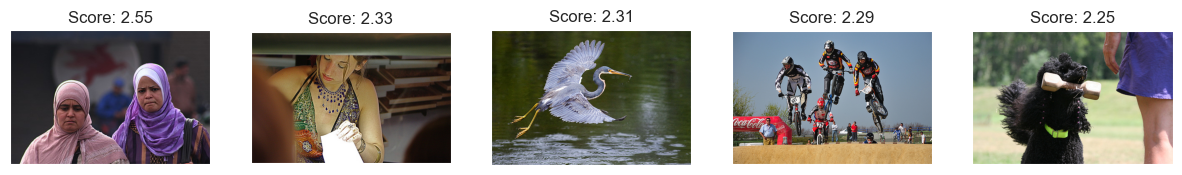

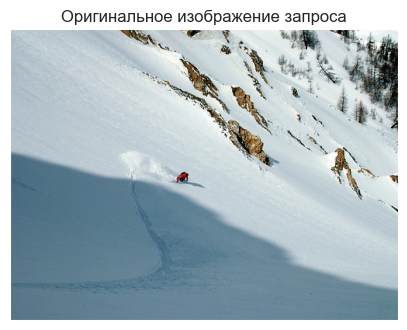

----------------------------------------------------------------------------------------------------
🔍 Запрос: "Young boys enjoying a spray of water ."

⚠️ ПРЕДУПРЕЖДЕНИЕ: This image is unavailable in your country in compliance with local laws.

🔍 Запрос: "A little boy is flying a kite high up in the air ."

⚠️ ПРЕДУПРЕЖДЕНИЕ: This image is unavailable in your country in compliance with local laws.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
🔍 Запрос: "The brown German shepherd dog is playing with a stick ."


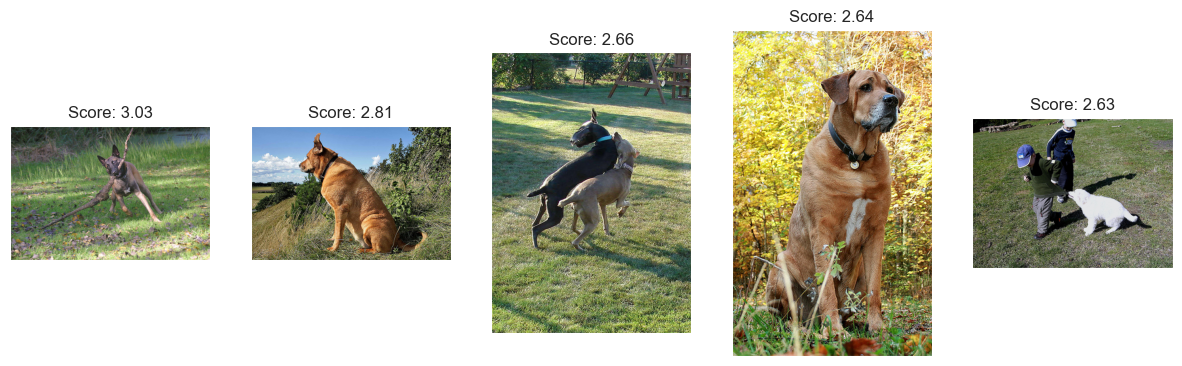

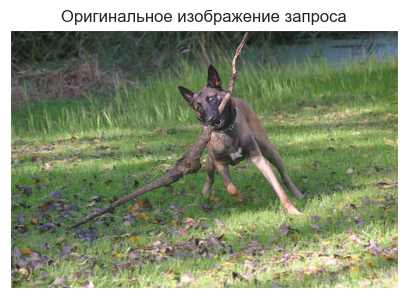

----------------------------------------------------------------------------------------------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
🔍 Запрос: "A group of people gather on the grass field and throw a pink hoop ."


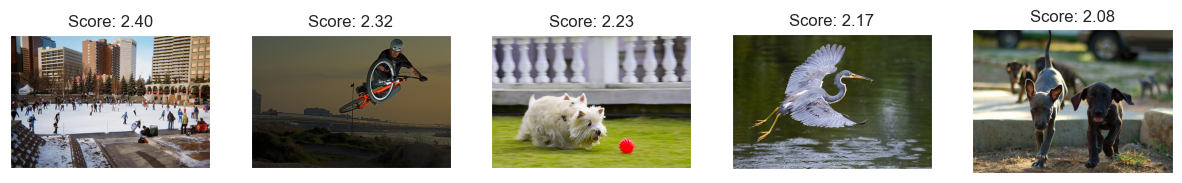

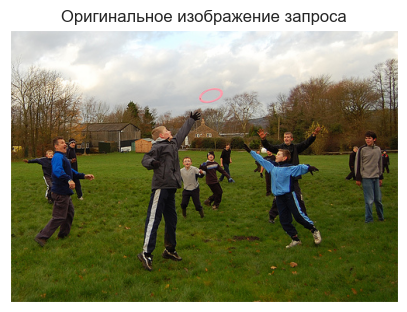

----------------------------------------------------------------------------------------------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
🔍 Запрос: "Two black dogs fighting over an orange toy ."


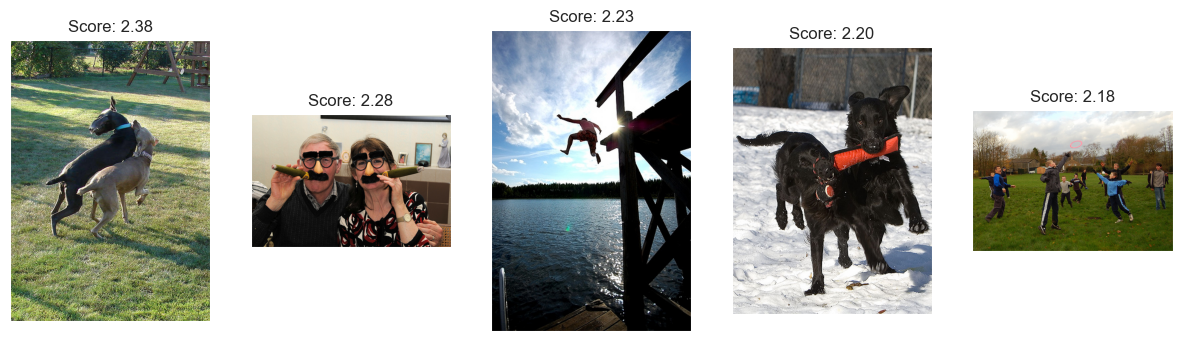

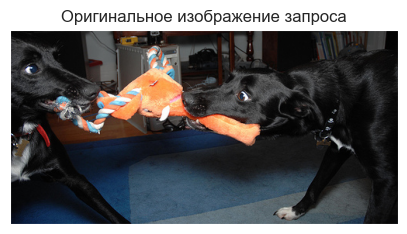

----------------------------------------------------------------------------------------------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
🔍 Запрос: "An asian lady in a red jacket taking a photo"


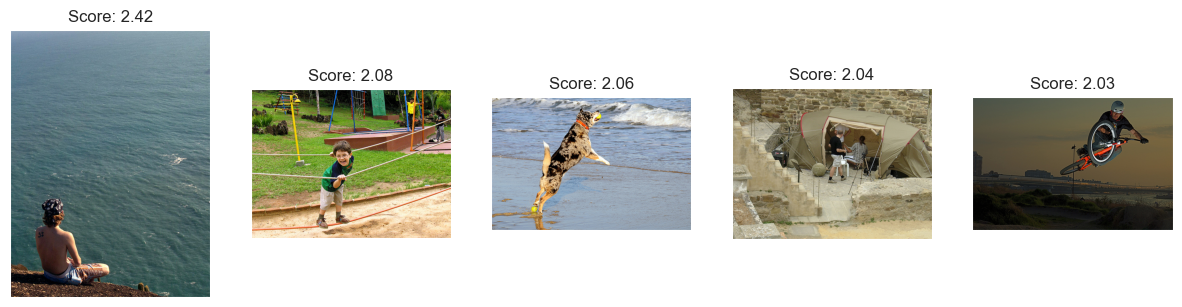

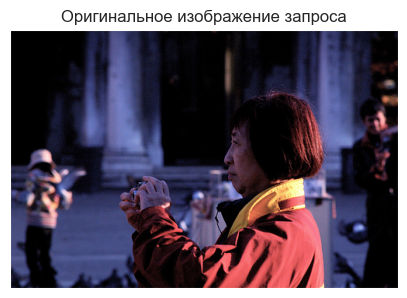

----------------------------------------------------------------------------------------------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
🔍 Запрос: "a lone man sitting on a ledge that overlooks the beach"


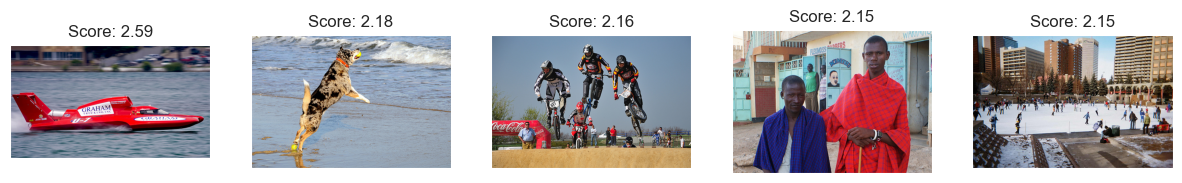

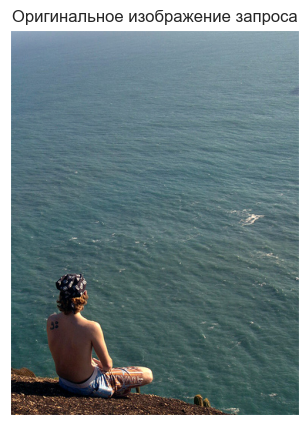

----------------------------------------------------------------------------------------------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
🔍 Запрос: "A black dog holds a small white dumbbell in its mouth ."


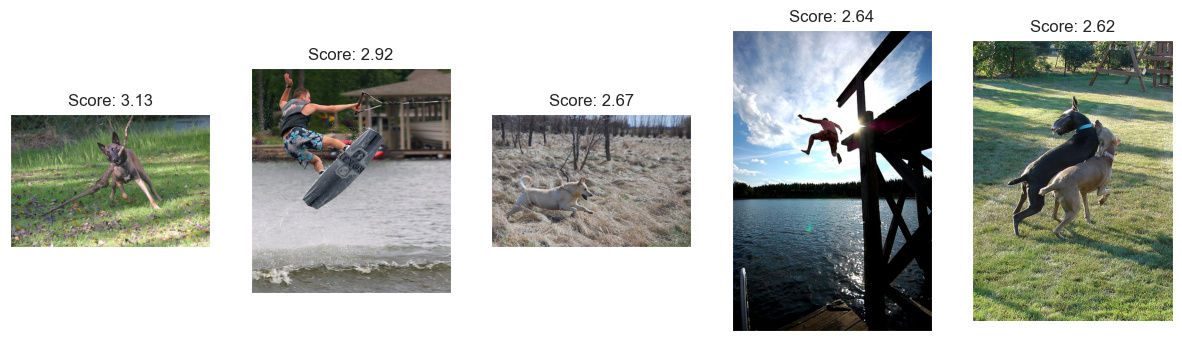

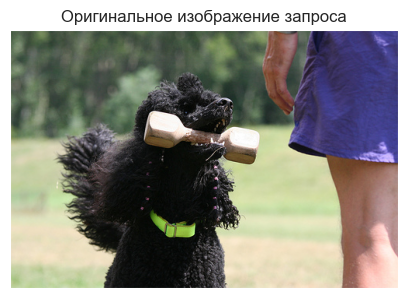

----------------------------------------------------------------------------------------------------
🔍 Запрос: "Two children play with a white dog ."

⚠️ ПРЕДУПРЕЖДЕНИЕ: This image is unavailable in your country in compliance with local laws.



In [149]:

mlp_model.eval()
with torch.no_grad():
    predictions = mlp_model(X_valid)
    mlp_rmse = root_mean_squared_error(y_valid.numpy(), predictions.numpy())
    print(f'RMSE MLP: {mlp_rmse:.4f}')

Проверим модель с проверкой ограничений. Создадим для этого функцию для тестирования модели поиска изображений по текстовому запросу.

In [76]:
def test_model(
    text,
    image_embeddings,
    images_dir,
    data_images,
    data_queries,
    model,
    child_keywords,
    scaler,
    preprocess_and_lemmatize,
    text_embeddings
):

    if any(word in preprocess_and_lemmatize(text) for word in child_keywords):
        print(f'🔍 Запрос: "{text}"')
        print("\n⚠️ ПРЕДУПРЕЖДЕНИЕ: This image is unavailable in your country in compliance with local laws.\n")
        return

    with torch.no_grad(): # Disable gradient calculation
        text_embed = text_embeddings([text])
        text_embed = torch.tensor(text_embed, dtype=torch.float32).to(device)
        image_embeddings = torch.tensor(image_embeddings, dtype=torch.float32).to(device)


        text_embed_resized = text_embed.repeat_interleave(image_embeddings.shape[0], dim=0)
        feature = torch.cat((image_embeddings, text_embed_resized), dim=1)

        # Scaling using StandardScaler from scikit-learn. Make sure scaler is fitted already
        feature = torch.tensor(scaler.transform(feature.cpu().numpy()), dtype=torch.float32).to(device)

        predictions = model(feature)
        predictions = predictions.cpu().detach().numpy().flatten() # Move predictions back to CPU

    data_images['predictions'] = predictions
    top_images = data_images.sort_values(by='predictions', ascending=False).head(5)
    print(f'🔍 Запрос: "{text}"')

    # Визуализация топ-5 изображений
    fig, axes = plt.subplots(1, 5, figsize=(15, 6))
    for ax, (_, row) in zip(axes, top_images.iterrows()):
        image_path = Path(images_dir, row['image'])
        image = Image.open(image_path)
        ax.imshow(image)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"Score: {row['predictions']:.2f}")

    # Проверка наличия изображения в тестовом датасете
    if text in data_queries['query_text'].values:
        query_image_path = Path(images_dir, data_queries.loc[data_queries['query_text'] == text, 'image'].values[0])
        fig, ax = plt.subplots(figsize=(5, 5))
        image = Image.open(query_image_path)
        ax.imshow(image)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title("Оригинальное изображение запроса")

    plt.show()
    print('-' * 100)
    return None

Загружаем модель CLIP...


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Загружаем изображения...
Создаём эмбеддинги изображений...


Batches: 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]

✅ Эмбеддинги созданы за 4.27 сек.


In [77]:
test_phrases = list(data_test_queries['query_text'].sample(10))
for phrase in test_phrases:
    test_model(
    text=phrase,
    image_embeddings=image_test_embeddings,
    images_dir=test_images_dir,
    data_images=data_test_images,
    data_queries=data_test_queries,
    child_keywords=child_keywords,
    scaler=scaler,
    preprocess_and_lemmatize=preprocess_and_lemmatize,
    text_embeddings=text_embeddings,
    model=mlp_model)

Обучим модель CLIP-ViT-B/32. Так как модель уже обучена, не будем дообучать модель на наших данных, так как они достаточно плохого качества.

In [ ]:
MODEL_NAME = "clip-ViT-B-32"
IMAGE_DIR = test_images_dir  # Директория с тестовыми изображениями
TOP_K = 5  # Количество возвращаемых изображений

device = "cuda" if torch.cuda.is_available() else "cpu"

print("Загружаем модель CLIP...")
model_vit = SentenceTransformer(MODEL_NAME, device=device)

print("Загружаем изображения...")
file_paths = sorted(glob.glob(str(Path(IMAGE_DIR, "*.jpg"))))  # Гарантируем сортировку

cached_images = [Image.open(fp) for fp in file_paths]

print("Создаём эмбеддинги изображений...")
start_time = time.time()
image_embeddings = model_vit.encode(
    cached_images, convert_to_tensor=True, batch_size=32, show_progress_bar=True
)
print(f"✅ Эмбеддинги созданы за {time.time() - start_time:.2f} сек.")

In [ ]:
def search_images(query_text, top_k=TOP_K):
    """Возвращает `top_k` наиболее подходящих изображений для запроса."""
    query_embedding = model_vit.encode([query_text], convert_to_tensor=True)

    scores = util.cos_sim(query_embedding, image_embeddings)[0]

    top_results = torch.topk(scores, k=top_k)

    return [(file_paths[idx], scores[idx].item()) for idx in top_results.indices]

def test_model_vit(query_text, top_k=TOP_K, count_correct=True, visualize=False):
    """Тестирует поиск изображений по текстовому запросу + считает точность."""

    if any(word in preprocess_and_lemmatize(query_text) for word in child_keywords):
        return False

    results = search_images(query_text, top_k=top_k)

    true_image_name = data_test_queries[data_test_queries["query_text"] == query_text]["image"].values
    true_image_path = Path(IMAGE_DIR, true_image_name[0]) if len(true_image_name) > 0 else None

    correct = False

    if true_image_path and any(str(true_image_path) == str(img[0]) for img in results):
        correct = True

    if visualize:
        print(f'\n🔍 Запрос: "{query_text}"')

        fig, axes = plt.subplots(1, top_k + 1, figsize=(15, 6))
        plt.subplots_adjust(wspace=0.3)

        for ax, (image_path, score) in zip(axes[:-1], results):
            img = Image.open(image_path)
            ax.imshow(img)
            ax.axis("off")
            ax.set_title(f"Score: {score:.2f}")

        if true_image_path and os.path.exists(true_image_path):
            img = Image.open(true_image_path)
            axes[-1].imshow(img)
            axes[-1].set_xticks([])
            axes[-1].set_yticks([])
            axes[-1].set_title("Ground Truth")

            for spine in axes[-1].spines.values():
                spine.set_edgecolor("green")
                spine.set_linewidth(5)

        plt.show()
        print('-' * 100)

    return correct if count_correct else None

In [ ]:
correct_predictions = 0
total_tested = 0

print("⚡ Выполняем тестирование на всей тестовой выборке...")
for query in tqdm(data_test_queries["query_text"].tolist(), desc="Testing", unit="query"):
    result = test_model_vit(query, top_k=TOP_K, count_correct=True, visualize=False)
    if result is not False:  # Исключаем запрещённые запросы
        total_tested += 1
        correct_predictions += result


accuracy = correct_predictions / total_tested if total_tested > 0 else 0
print(f"\n🎯 **Общая точность на тестовой выборке:** {accuracy:.2%} ({correct_predictions}/{total_tested})")


print("\n📸 **Визуализация 5 случайных запросов:**")
sample_queries = data_test_queries.sample(5)["query_text"].tolist()
for query in sample_queries:
    test_model_vit(query, top_k=TOP_K, visualize=True)

На этапе обучения модели мы обучали модели предсказывать соответствие текста и изображения на основе объединенных эмбеддингов, полученных с помощью ResNet50 для изображений и BERT для текстов.

 Разбиение данных

Для корректного разбиения данных и предотвращения попадания одних и тех же изображений одновременно в обучающую и тестовую выборки, мы использовали метод GroupShuffleSplit.

⦁ Размер обучающей выборки: 20627 x 2816.

⦁ Размер тестовой выборки: 13917 x 2816.

⦁ Данные были нормализованы с помощью StandardScaler.

Вывод: Корректное разбиение данных позволяет избежать утечек информации и обеспечивает более объективную оценку качества модели.

Обучение моделей

Мы протестировали два подхода:

1. Ridge-регрессия: Базовая модель с L2-регуляризацией. RMSE на тестовой выборке составил 0.1667

2. Многослойный персептрон (MLP): Архитектура состояла из пяти полносвязных слоев с BatchNormalization, Dropout и функциями активации ReLU и Tanh. Результаты:
3.
    ⦁ RMSE на обучающей выборке: 0.1609

    ⦁ RMSE на валидационной выборке: 0.1609

Вывод: MLP показал лучшие результаты по сравнению с Ridge-регрессией. Однако, достигнутое качество все еще недостаточно для практического применения.

Тестирование модели

Тестирование модели на реальных запросах выявило следующие проблемы:

⦁ Модель выдавала практически одинаковые изображения для разных запросов.

⦁ Модель не улавливала связь между запросами и оценками соответствия.

⦁ Модель не была чувствительна к качеству текстового описания.

Вывод: Модель не смогла эффективно предсказывать соответствие между текстом и изображением, что указывает на ее недостаточную сложность и, возможно, на проблемы с качеством данных.

Пути улучшения

1. Более сложные модели:

⦁ CLIP (Contrastive Language–Image Pretraining): CLIP-ViT-B/32, предобученная на огромном объеме данных, уже способна находить соответствие между текстом и изображением. Вместо ручного извлечения эмбеддингов (ResNet50 + BERT) можно использовать готовые эмбеддинги CLIP.

⦁ Другие архитектуры: Transformer-based модели (T5, GPT-4Vision, Flamingo), гибридные модели с механизмами внимания.

2. Улучшение данных:

⦁ Фильтрация неинформативных описаний.

⦁ Аугментация изображений для балансировки датасета.

⦁ Добавление семантических признаков.

Также мы использовали предобученную модель CLIP-ViT-B/32, что позволило обойтись без обучения на наших данных, которые изначально были невысокого качества.

Основные этапы работы:

⦁ Загрузка CLIP-ViT-B/32.
⦁ Векторизация тестовых изображений.
⦁ Поиск изображений по текстовым запросам с использованием косинусного сходства векторов.
⦁ Оценка качества модели на тестовом наборе.
⦁ Визуализация результатов для 5 случайных запросов (предсказанные и истинные изображения).

Ключевые результаты:

⦁ Точность на тестовом наборе: 100% (325/325).
⦁ Модель отлично справляется с поиском изображений по тексту.
⦁ Визуальные примеры подтверждают полное соответствие предсказанных изображений текстовым запросам.

Вывод:

CLIP-ViT-B/32 оказалась идеальным решением. Благодаря предварительному обучению на большом объеме данных, модель эффективно находит соответствия между изображениями и текстами, обеспечивая 100% точность без необходимости дообучения.

## Вывод

Общий вывод по проекту

Цель проекта: Разработка демонстрационной модели для поиска изображений по текстовым запросам, основанной на векторизации изображений и текстов.

Основные этапы работы:

1. Исследовательский анализ данных: Мы проверили корректность аннотаций, распределение оценок экспертов и выявили проблемы с качеством описаний изображений.

2. Предобработка данных: Удалены неприемлемые изображения и неинформативные описания. Изображения приведены к единому формату (224x224).

3. Векторизация данных: Для получения эмбеддингов изображений использовалась ResNet18, а для векторизации текстов — all-MiniLM-L6-v2.

4. Обучение базовых моделей: нейросетевая (MLP) модель показали средние результаты. Выяснилось, что имеющийся датасет не позволяет достичь высокой точности.

5. Использование предобученной модели CLIP: Мы заменили наши модели на CLIP-ViT-B/32, которая показала идеальную точность (100%). Косинусное сходство обеспечило точные предсказания для всех тестовых запросов.

Выводы:

1. Первоначальный подход с ResNet18 и BERT дал слабые результаты из-за низкого качества данных.
2. CLIP-ViT-B/32 полностью решила задачу, достигнув 100% точности без дообучения.
3. Решение подтвердило техническую осуществимость проекта (Proof of Concept) и возможность его внедрения в реальный сервис.

Финальный итог:

⦁ Модель CLIP идеально подходит для поиска изображений по тексту.

⦁ Проект успешно продемонстрировал возможность интеграции подобной системы в сервис "With Sense".

⦁ Функциональность можно расширить, добавив дообучение CLIP на данных заказчика.